In [19]:
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('/Users/niko/Documents/uni/6. semester/bsc/Project/BSc-Project/handcrafted_model/metadata/model_training_results_svm.csv')

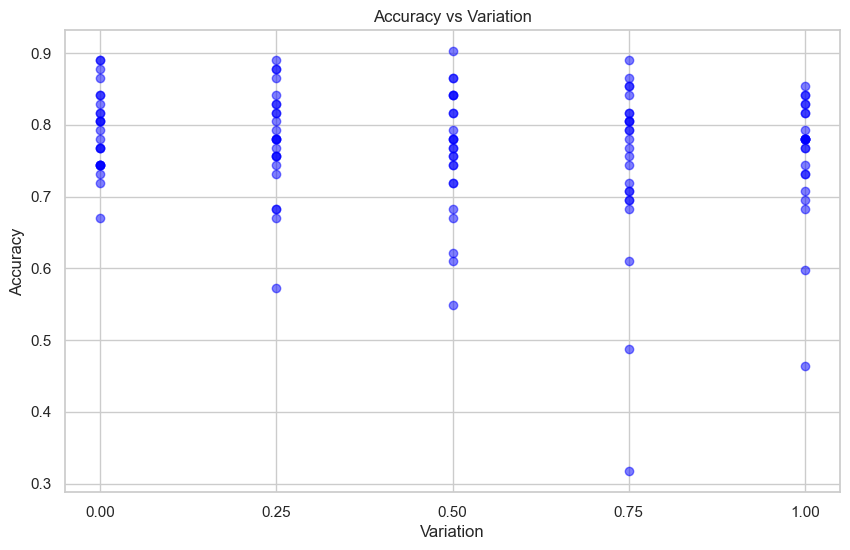

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(data['variation'], data['accuracy'], color='blue', alpha=0.5)
plt.xticks(ticks=np.arange(0, data['variation'].max() + 0.25, 0.25))  # Custom ticks at every 0.25 interval
plt.title('Accuracy vs Variation')
plt.xlabel('Variation')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

/var/folders/yq/d0xp5r_x1nv_sbq6087fhk5c0000gn/T/ipykernel_32511/2391213984.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
/var/folders/yq/d0xp5r_x1nv_sbq6087fhk5c0000gn/T/ipykernel_32511/2391213984.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_std = results.bse[1]
/var/folders/yq/d0xp5r_x1nv_sbq6087fhk5c0000gn/T/ipykernel_32511/2391213984.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

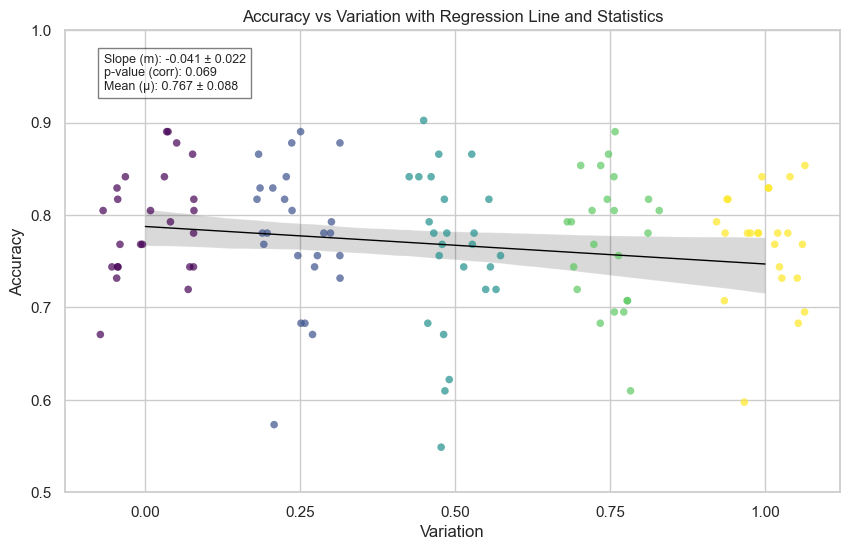

In [22]:
# Set up the plotting aesthetics to be similar to the provided script
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Prepare the dataframe in the same format expected by the plotting function
# In this case, we are just duplicating the variation column to serve as a hue for color
df_for_plot = data.copy()
df_for_plot['variation_hue'] = df_for_plot['variation']

# Define the plotting function similar to 'gen_plot_panel' from the provided code
def gen_plot_panel(x_var, y_var, data):
    # Perform OLS regression and get the results
    mdl = ols(formula=f'{y_var} ~ {x_var}', data=data)
    results = mdl.fit()
    slope = results.params[1]
    slope_std = results.bse[1]
    p_value = results.pvalues[1]
    # Bonferroni correction: not required here as we only do one test
    p_corr = p_value
    
    # Plot regression line and annotate with stats
    ax = plt.gca()
    slope_str = f"Slope (m): {slope:.3f} ± {slope_std:.3f}\n"
    p_str = f"p-value (corr): {p_corr:.3f}\n"
    mu_str = f"Mean (μ): {data[y_var].mean():.3f} ± {data[y_var].std():.3f}"
    text_str = slope_str + p_str + mu_str
    t = ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=9, verticalalignment='top')
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
    
    # Add the regression line
    sns.regplot(x=x_var, y=y_var, data=data, ax=ax, scatter=False, fit_reg=True, color="black", line_kws={'linewidth': 1})
    # Jitter the data points for scatter plot
    data[x_var] = data[x_var] + np.random.uniform(-0.08, 0.08, data[x_var].shape)
    # Plot the jittered scatter points
    sns.scatterplot(x=x_var, y=y_var, data=data, hue='variation_hue', s=30, ax=ax, palette="viridis", linewidth=0, alpha=0.7, legend=None)

# Generate the plot
gen_plot_panel(x_var='variation', y_var='accuracy', data=df_for_plot)
plt.xticks(ticks=np.arange(0, data['variation'].max() + 0.25, 0.25))  # Custom ticks at every 0.25 interval
plt.ylim(bottom=0.5, top=1.0)  # Custom y-axis limits
plt.xlabel('Variation')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Variation with Regression Line and Statistics')
plt.show()


/var/folders/yq/d0xp5r_x1nv_sbq6087fhk5c0000gn/T/ipykernel_32511/2229024944.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
/var/folders/yq/d0xp5r_x1nv_sbq6087fhk5c0000gn/T/ipykernel_32511/2229024944.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_std = results.bse[1]
/var/folders/yq/d0xp5r_x1nv_sbq6087fhk5c0000gn/T/ipykernel_32511/2229024944.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

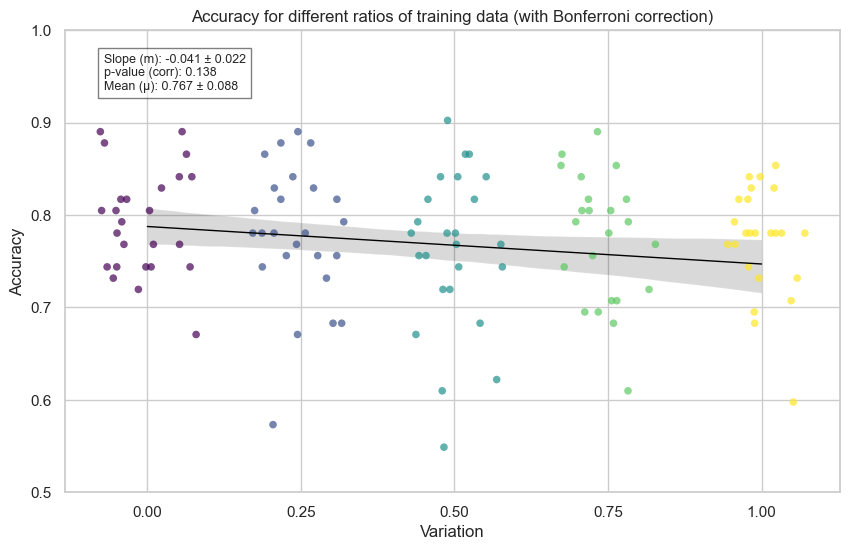

In [23]:
# Set up the plotting aesthetics to be similar to the provided script
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Prepare the dataframe in the same format expected by the plotting function
# In this case, we are just duplicating the variation column to serve as a hue for color
df_for_plot = data.copy()
df_for_plot['variation_hue'] = df_for_plot['variation']

# Define the plotting function similar to 'gen_plot_panel' from the provided code
def gen_plot_panel(x_var, y_var, data):
    # Perform OLS regression and get the results
    mdl = ols(formula=f'{y_var} ~ {x_var}', data=data)
    results = mdl.fit()
    slope = results.params[1]
    slope_std = results.bse[1]
    p_value = results.pvalues[1]
    corr_factor = 2
    # Bonferroni correction: not required here as we only do one test
    #NOT SURE IF THIS IS CORRECT, AS WE'RE NOT DOING THE WILCOXON THING, MAYBE CONSIDER IT
    p_corr = p_value * corr_factor
    
    # Plot regression line and annotate with stats
    ax = plt.gca()
    slope_str = f"Slope (m): {slope:.3f} ± {slope_std:.3f}\n"
    p_str = f"p-value (corr): {p_corr:.3f}\n"
    mu_str = f"Mean (μ): {data[y_var].mean():.3f} ± {data[y_var].std():.3f}"
    text_str = slope_str + p_str + mu_str
    t = ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=9, verticalalignment='top')
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
    
    # Add the regression line
    sns.regplot(x=x_var, y=y_var, data=data, ax=ax, scatter=False, fit_reg=True, color="black", line_kws={'linewidth': 1})
    # Jitter the data points for scatter plot
    data[x_var] = data[x_var] + np.random.uniform(-0.08, 0.08, data[x_var].shape)
    # Plot the jittered scatter points
    sns.scatterplot(x=x_var, y=y_var, data=data, hue='variation_hue', s=30, ax=ax, palette="viridis", linewidth=0, alpha=0.7, legend=None)

# Generate the plot
gen_plot_panel(x_var='variation', y_var='accuracy', data=df_for_plot)
plt.xticks(ticks=np.arange(0, data['variation'].max() + 0.25, 0.25))  # Custom ticks at every 0.25 interval
plt.ylim(bottom=0.5, top=1.0)  # Custom y-axis limits
plt.xlabel('Variation')
plt.ylabel('Accuracy')
plt.title('Accuracy for different ratios of training data (with Bonferroni correction)')
plt.savefig('/Users/niko/Documents/uni/6. semester/bsc/Project/BSc-Project/plots/accuracy_vs_ratio_svm.png')
plt.show()


/var/folders/yq/d0xp5r_x1nv_sbq6087fhk5c0000gn/T/ipykernel_32511/341651078.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
/var/folders/yq/d0xp5r_x1nv_sbq6087fhk5c0000gn/T/ipykernel_32511/341651078.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_std = results.bse[1]
/var/folders/yq/d0xp5r_x1nv_sbq6087fhk5c0000gn/T/ipykernel_32511/341651078.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

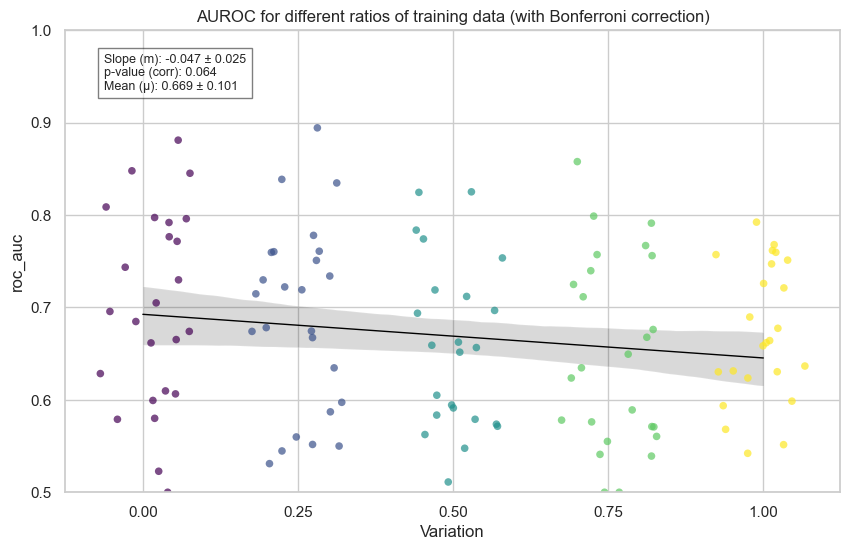

In [24]:
# Set up the plotting aesthetics to be similar to the provided script
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Prepare the dataframe in the same format expected by the plotting function
# In this case, we are just duplicating the variation column to serve as a hue for color
df_for_plot = data.copy()
df_for_plot['variation_hue'] = df_for_plot['variation']

# Define the plotting function similar to 'gen_plot_panel' from the provided code
def gen_plot_panel(x_var, y_var, data):
    # Perform OLS regression and get the results
    mdl = ols(formula=f'{y_var} ~ {x_var}', data=data)
    results = mdl.fit()
    slope = results.params[1]
    slope_std = results.bse[1]
    p_value = results.pvalues[1]
    # Bonferroni correction: not required here as we only do one test
    #NOT SURE IF THIS IS CORRECT, AS WE'RE NOT DOING THE WILCOXON THING, MAYBE CONSIDER IT
    p_corr = p_value
    
    # Plot regression line and annotate with stats
    ax = plt.gca()
    slope_str = f"Slope (m): {slope:.3f} ± {slope_std:.3f}\n"
    p_str = f"p-value (corr): {p_corr:.3f}\n"
    mu_str = f"Mean (μ): {data[y_var].mean():.3f} ± {data[y_var].std():.3f}"
    text_str = slope_str + p_str + mu_str
    t = ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=9, verticalalignment='top')
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
    
    # Add the regression line
    sns.regplot(x=x_var, y=y_var, data=data, ax=ax, scatter=False, fit_reg=True, color="black", line_kws={'linewidth': 1})
    # Jitter the data points for scatter plot
    data[x_var] = data[x_var] + np.random.uniform(-0.08, 0.08, data[x_var].shape)
    # Plot the jittered scatter points
    sns.scatterplot(x=x_var, y=y_var, data=data, hue='variation_hue', s=30, ax=ax, palette="viridis", linewidth=0, alpha=0.7, legend=None)

# Generate the plot
gen_plot_panel(x_var='variation', y_var='roc_auc', data=df_for_plot)
plt.xticks(ticks=np.arange(0, data['variation'].max() + 0.25, 0.25))  # Custom ticks at every 0.25 interval
plt.ylim(bottom=0.5, top=1.0)  # Custom y-axis limits
plt.xlabel('Variation')
plt.ylabel('roc_auc')
plt.title('AUROC for different ratios of training data (with Bonferroni correction)')
plt.savefig('/Users/niko/Documents/uni/6. semester/bsc/Project/BSc-Project/plots/auroc_vs_ratio_svm.png')
plt.show()
